last values for 2000 episodes 
     1e-3 * 0.995: 4.449778678199305e-08, 
     1e-4 * 0.996: 3.314496074297814e-08, 
     1e-4 * 0.997: 2.4638908514894327e-07, 
     1e-4 * 0.998: 1.8278983190130897e-06, 
     1e-4 * 0.999985: 4.382983047707889e-07


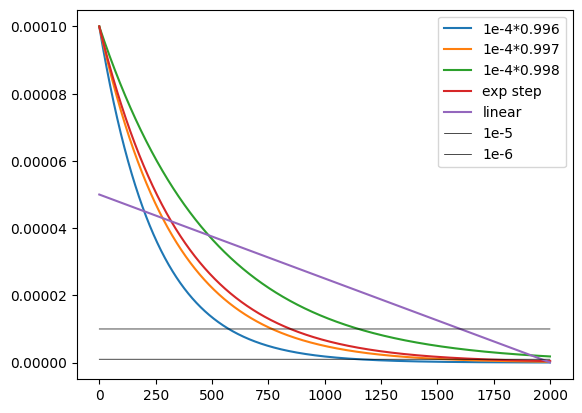

1962


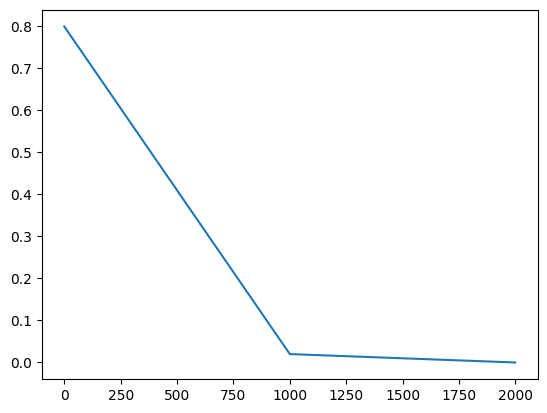

In [1]:
%run base.ipynb
import utils
import matplotlib.pyplot as plt
import numpy as np

episodes = 2000

decay_1 = utils.exponential_decay(factor=0.995)
decay_2 = utils.exponential_decay(factor=0.996)
decay_3 = utils.exponential_decay(factor=0.997)
decay_4 = utils.exponential_decay(factor=0.998)
decay_5 = utils.exponential_decay(factor=0.999985)

lin_decay = utils.linear_decay(episodes, 1e-4, 1e-7)

lr_values_1 = [1e-3 * decay_1(step) for step in range(episodes)]
lr_values_2 = [1e-4 * decay_2(step) for step in range(episodes)]
lr_values_3 = [1e-4 * decay_3(step) for step in range(episodes)]
lr_values_4 = [1e-4 * decay_4(step) for step in range(episodes)]
lr_values_5 = [1e-4 * decay_5(step) for step in range(episodes*181)]

lr_values_lin = [5*1e-5 * lin_decay(step) for step in range(episodes)]

rule_5 = [1e-5 for _ in range(episodes)]
rule_6 = [1e-6 for _ in range(episodes)]
rule_7 = [1e-7 for _ in range(episodes)]

rule_1000 = [lr_values_2[999] for _ in range(episodes)]


print(
    "last values for {} episodes \n \
    1e-3 * 0.995: {}, \n \
    1e-4 * 0.996: {}, \n \
    1e-4 * 0.997: {}, \n \
    1e-4 * 0.998: {}, \n \
    1e-4 * 0.999985: {}".format(
    episodes, lr_values_1[-1], lr_values_2[-1], lr_values_3[-1], lr_values_4[-1], lr_values_5[-1]))

id = 0
#plt.plot(lr_values_1[id:], label="1e-3*0.995")
plt.plot(lr_values_2[id:], label="1e-4*0.996")
plt.plot(lr_values_3[id:], label="1e-4*0.997")
plt.plot(lr_values_4[id:], label="1e-4*0.998")
plt.plot(np.linspace(0, 2000, 2000*181), lr_values_5, label="exp step")
plt.plot(lr_values_lin[id:], label="linear")

plt.plot(rule_5, color="black", label="1e-5", lw=0.5)
plt.plot(rule_6, color="black", label="1e-6", lw=0.5)
#plt.plot(rule_1000[id:], label="{:3f}".format(lr_values_2[999]))
plt.legend()
plt.show()

for i in range(episodes):
    if lr_values_lin[i] <= 1e-6:
        print(i)
        break

##### epsilon
eps_decay_1 = [0.8 * utils.linear_decay(episodes//2, 0.8, 0.02)(step) for step in range(episodes//2)]
eps_decay_2 = [0.02 * utils.linear_decay(episodes//2, 0.02, 0.0)(step) for step in range(episodes//2)]
eps_decay = eps_decay_1 + eps_decay_2
plt.plot(eps_decay, label="eps_decay")
plt.show()
    

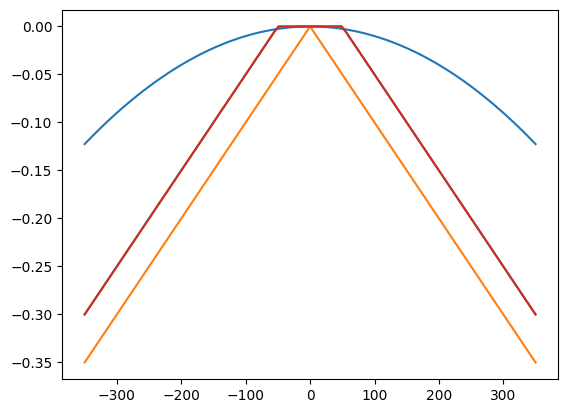

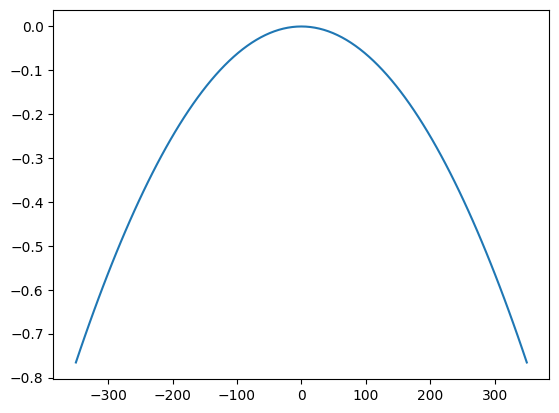

In [2]:
def f2(i_T, i_0=400, i_max=1000):
    C = - (i_max / i_0) ** (-2)
    return (i_T / i_0) ** 2 * C

def f_lin(i_T, i_0=400, i_max=1000):
    C = - (i_max / i_0) ** (-1)
    return (abs(i_T) / i_0) * C

def f_flat(i_T, i_max=1000, offset=50, C=-1):
    inventory_pct = i_T / i_max
    offset = offset / i_max
    i_T = max(abs(inventory_pct) - offset, 0)
    return i_T * C

def f_flat2(i_T, i_max=1000, offset=50, C=-1):
    inventory_pct = (abs(i_T) - offset)/(i_max)
    return max(inventory_pct, 0) * C

i_T = np.linspace(-350, 350, 101)
r_400 = [f2(400) for _ in range(len(i_T))]

plt.plot(i_T, f2(i_T))
#plt.plot(i_T, [f2(400) for _ in range(len(i_T))])
plt.plot(i_T, f_lin(i_T))
#plt.plot(i_T, [f_lin(400) for _ in range(len(i_T))])
plt.plot(i_T, [f_flat(x, offset=50) for x in i_T])
plt.plot(i_T, [f_flat2(x, offset=50) for x in i_T])
plt.show()

def f_new(i_T, i_0=400, i_max=1000, C=-1):
    return C * (i_T / i_0) ** 2

plt.plot(i_T, f_new(i_T))

In [3]:
from IPython.display import clear_output
import time 

for i in range(10):
    clear_output(wait=True)
    print(i)
    time.sleep(1)

9


In [4]:
environment_params = {
    'starting_inventory': 100,
    'starting_cash': 1000
}

training_params = {
    'lr': 0.001,
    'n_episodes': 200
}

sig_q_params = {
    'truncation_order': 7
}

hyperparamter_dict = {
    'environment': environment_params,
    'training': training_params,
    'q_estimate': sig_q_params
}

print(type(hyperparamter_dict))
print(hyperparamter_dict)

def training_fun(env, lr = 0.1, n_episodes=10):
    print('This works')

training_fun(None, **hyperparamter_dict['training'])

<class 'dict'>
{'environment': {'starting_inventory': 100, 'starting_cash': 1000}, 'training': {'lr': 0.001, 'n_episodes': 200}, 'q_estimate': {'truncation_order': 7}}
This works


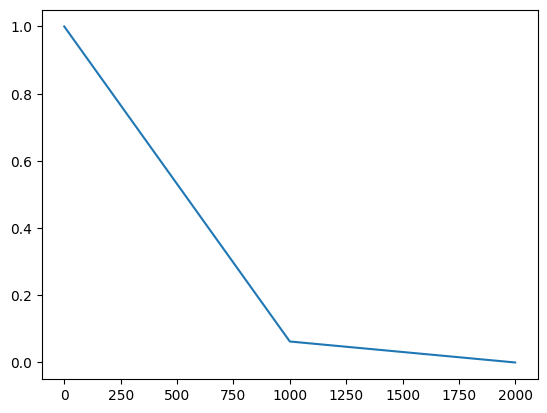

0.8609374999999999 0.90625 1.0


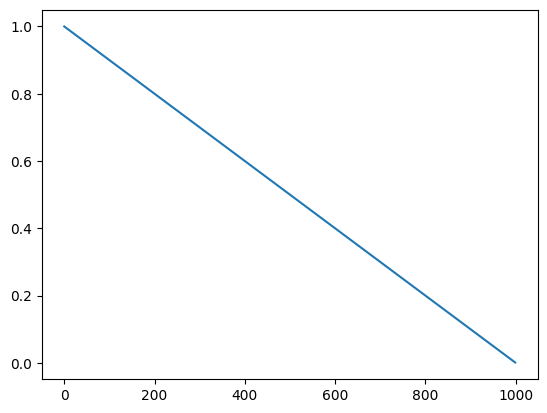

In [7]:
schedule_1 = utils.linear_decay(1000, 0.8, 0.05)
schedule_2 = utils.linear_decay(1000, start=0.05, end=0)

schedule_3 = utils.piecewise_decay(2000, 1000, schedule_1, schedule_2)

plt.plot([schedule_3(x) for x in range(2000)])
plt.show()
plt.plot([schedule_2(x) for x in range(1000)])
print(schedule_1(100) * schedule_2(50), schedule_1(100), schedule_2(0))
